In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
data=pd.read_csv('LinearRegression.csv')

data1=data[["price","sqft_living"]]
data2=data[["price","bedrooms"]]
data3=data[["price","bathrooms"]]
data4=data[["price","floors"]]

## for price and bedrooms

In [4]:
data2.head()

,price,bedrooms
0,221900,3
1,538000,3
2,180000,2
3,604000,4
4,510000,3


In [5]:
data2.tail()

,price,bedrooms
21608,360000,3
21609,400000,4
21610,402101,2
21611,400000,3
21612,325000,2


In [6]:
data2.dtypes

price       int64
bedrooms    int64
dtype: object

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21613 non-null  int64
 1   sqft_living  21613 non-null  int64
dtypes: int64(2)
memory usage: 337.8 KB


In [7]:
data2.describe()

,price,bedrooms
count,2.161300e+04,21613.000000
mean,5.400881e+05,3.370842
std,3.671272e+05,0.930062
min,7.500000e+04,0.000000
25%,3.219500e+05,3.000000
50%,4.500000e+05,3.000000
75%,6.450000e+05,4.000000
max,7.700000e+06,33.000000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D915F1B6C8>,
      dtype=object)

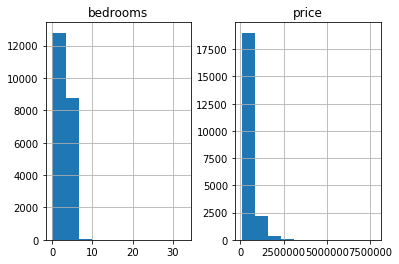

In [8]:
data2.hist()

In [9]:
data2.corr()

,price,bedrooms
price,1.00000,0.30835
bedrooms,0.30835,1.00000


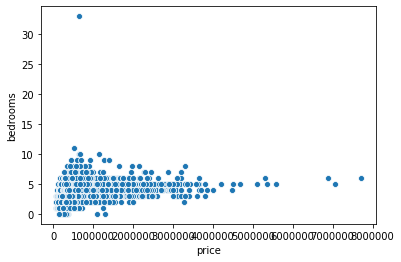

In [10]:
sns.scatterplot(data2['price'],data2['bedrooms'])

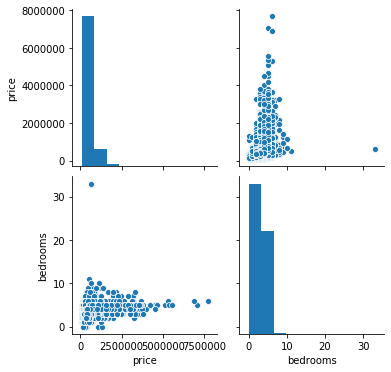

In [11]:
sns.pairplot(data2)

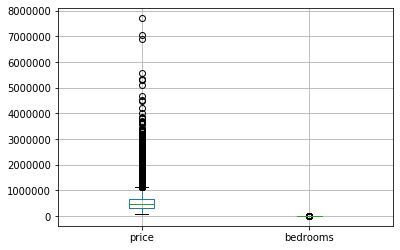

In [12]:
data2.boxplot()

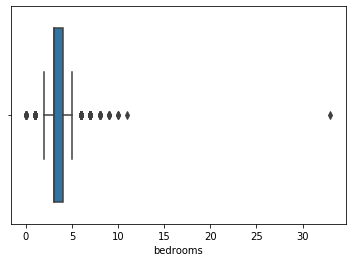

In [13]:
sns.boxplot(data2['bedrooms'])

# Assign the features to X & Y

In [14]:
data2.head(1)

,price,bedrooms
0,221900,3


In [15]:
x=data2.iloc[:,:1]

In [16]:
x.head(1)

,price
0,221900


In [17]:
y=data2.iloc[:,1:]

In [18]:
y.head(1)

,bedrooms
0,3


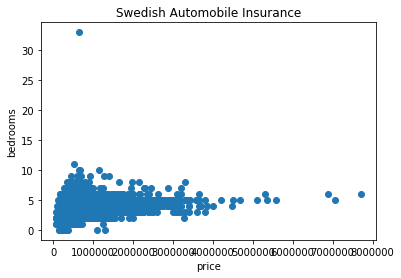

In [20]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Swedish Automobile Insurance')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

# Split the records for training & testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [39]:
data2.shape

(21613, 2)

In [23]:
X_train.shape

(17290, 1)

In [24]:
X_test.shape

(4323, 1)

In [25]:
y_train.shape

(17290, 1)

In [26]:
y_test.shape

(4323, 1)

# Model Building with sklearn

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


# Train the model

In [28]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lin_reg.coef_

array([[7.70125623e-07]])

In [30]:
lin_reg.intercept_

array([2.95061418])

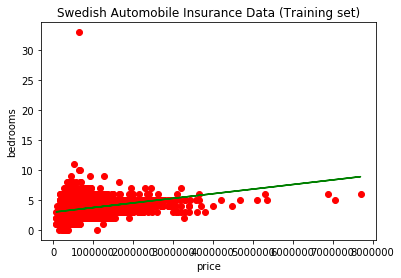

In [31]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()


# Test the model

In [32]:
ypred=lin_reg.predict(X_test)
ypred

array([[3.51665652],
       [3.83625865],
       [3.22054321],
       ...,
       [3.25670061],
       [3.23941129],
       [3.11080031]])

In [33]:
X_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [34]:
data1.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


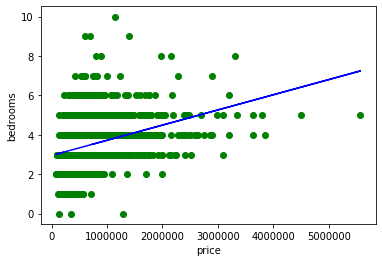

In [35]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()


# estimate the cost

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10933217805863649
The RMSE value is........ 0.8736548931683022


In [37]:
data1.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


# How to predict for unseen value

In [40]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given price is....',unseen_pred)

The unseen for the given price is.... [[2.95310477]]
